Considering the base $\{X,Y,Z\}$ where each element is a Paulli's matrices : 
$
        \sigma_x =   , \sigma_y=  ,\sigma_z= 
$
and the simplest control quantum mechanical system : 


$
        i\dot{\psi} = \frac{1}{2}(\omega \sigma_z + u_x \sigma_x + u_y \sigma_y )\psi
$


Let's make some basics quantum gates, in order to do that we need to solve this Cauchy's problem :
$
    \dot{U} =  -\frac{i}{2}(\omega \sigma_z + u_x \sigma_x + u_y \sigma_y )U, \quad U(0)= \mathrm{id}.
$

F_Z = 0.9999999560564253 %


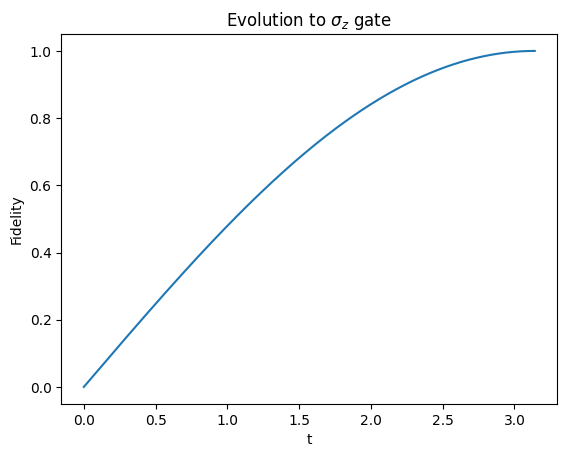

In [2]:
import numpy as np
import matplotlib.pyplot as plt

PI = np.pi
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)
I = np.eye(2, dtype=complex)
omega = 1
dt = 0.001
T = PI / omega       
N = int(T/dt)
# print(N)
u_x = np.zeros(N)
u_y = np.zeros(N)
U = I.copy()
Us = [U]


for i in range(N):
    H = 0.5 * (omega * sigma_z + u_x[i]*sigma_x + u_y[i]*sigma_y)
    U = U - 1j * H @ U * dt   
    U, _ = np.linalg.qr(U)
    Us.append(U)
Target = sigma_z

F = [0.5 * abs(np.trace(Ut.conj().T @ Target)) for Ut in Us] # Fidelity 
print(f"F_Z = {F[-1]} %")

plt.plot(np.linspace(0, T, len(F)), F)
plt.xlabel('t')
plt.ylabel('Fidelity')
plt.title(r'Evolution to $\sigma_z$ gate')
plt.show()


F_X = 0.95 %


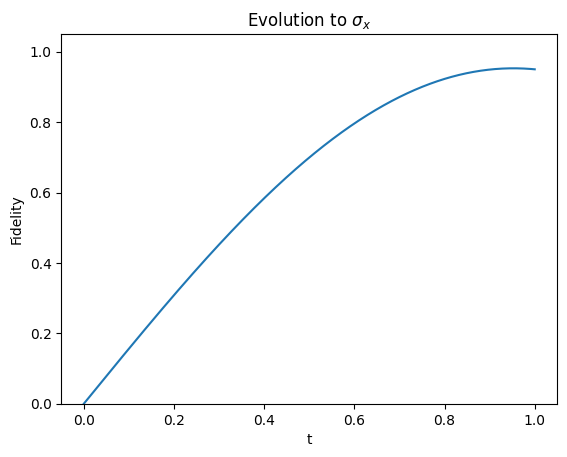

In [7]:
# Target X gate
T = 1.0
N = int(T/dt)

# Control field for X gate
k = 0
alpha = PI*(2*k+1)/T 

u_x = np.ones(N) * alpha
u_y = np.zeros(N)    

U = I.copy()
Us = [U]

for i in range(N):
    H = 0.5*(omega*sigma_z + u_x[i]*sigma_x + u_y[i]*sigma_y)
    U = U - 1j * H @ U * dt
    W, s, Vh = np.linalg.svd(U)
    U = W @ Vh   # Keeping U unitary
    Us.append(U)

Target = sigma_x


F = [0.5 * abs(np.trace(Ut.conj().T @ Target)) for Ut in Us]
print(f"F_X = {F[-1]:.2f} %")

plt.plot(np.linspace(0, T, len(F)), F)
plt.xlabel('t')
plt.ylabel('Fidelity')
plt.title(r'Evolution to $\sigma_x$')
plt.ylim(0, 1.05)
plt.show()

#Ask Ivan if this is better to have a longer k to increase the fidelity

F_y = 0.9994935569303549 %


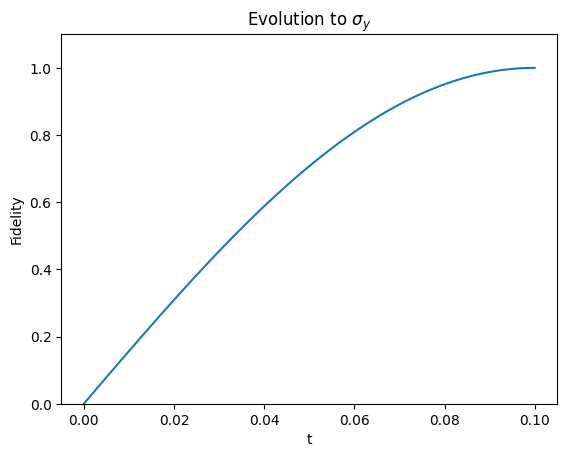

In [ ]:
# Target y gate
T = 0.1
N = int(T/dt)
# omega = 0.0
# Control field for Y gate
k = 0
alpha = (PI*(2*k+1)/T )*omega
# print(f"alpha = {alpha}")

u_x = np.zeros(N)
u_y = np.ones(N) * alpha

U = I.copy()
Us = [U]

for i in range(N):
    H = 0.5*(omega*sigma_z + u_y[i]*sigma_y)
    U = U - 1j * H @ U * dt 
    W, s, Vh = np.linalg.svd(U)
    U = W @ Vh   
    Us.append(U)

Target = sigma_y


F = [0.5 * abs(np.trace(Ut.conj().T @ Target)) for Ut in Us]
print(f"F_y = {F[-1]} %")
# print(f"F_y = {F[-1]:.2f} %")

plt.plot(np.linspace(0, T, len(F)), F)
plt.xlabel('t')
plt.ylabel('Fidelity')
plt.title(r'Evolution to $\sigma_y$')
plt.ylim(0, 1.1)
plt.show()
